<a href="https://colab.research.google.com/github/phyml4e/PINNs/blob/main/First_order_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**More information about this short introduction/code as well as the performance of some possible version of PINNs can be found in our paper:**

http://arxiv.org/abs/2206.13103

**For more information about PINNs in general see:**

https://arxiv.org/abs/1711.10561

**For more information about SciAnn library see:**

https://arxiv.org/abs/2005.08803

**SciAnn** is a library for the performing Physics-Informed Neural Network. More info can be found at www.sciann.com.



In [ ]:
pip install sciann -q

     |████████████████████████████████| 174 kB 15.8 MB/s 
     |████████████████████████████████| 460.3 MB 7.5 kB/s 
     |████████████████████████████████| 561 kB 48.4 MB/s 
     |████████████████████████████████| 132 kB 42.4 MB/s 
     |████████████████████████████████| 1.2 MB 38.5 MB/s 
     |████████████████████████████████| 4.0 MB 43.2 MB/s 
     |████████████████████████████████| 462 kB 55.2 MB/s 
     |████████████████████████████████| 14.8 MB 44.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Importing the necessary  libraries and functions.**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sciann as sn
from sciann.utils.math import diff, sin, cos

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



**Choosing parameters and hyper-parameters of the neural network.**

In [ ]:
dtype     = 'float64'     # type of the input
n_of_n    = 4*[20]        # number of neurons (layers*[neurons])
act       = 'sin'         # activation function ## different activation
                          # function can be used such as:
                          # "tanh", "softplus", "Relu", "sigmoid", "softmax" 
LR        = 0.01          # learning rate in adam optimizer ## reduce for getting better (but slower) convergence
Epochs    = 500           # number of epochs ## increase for getting better accuracy
batch     = 50            # batch size ## increase for getting better accuracy
n_d       = 500           # number of data points ## increase for getting better accuracy
b_l       = 0             # left boundary
b_r       = 10            # right boundary
Optimizer ='adam'         # other available optimizer in Keras 
                          # such as 'scipy-l-BFGS-B' , 'SGD'
choice = 2                # choose 1 for "pure" PINNS (forward/without any data), 2 for PINNs and data (inverse)

In [ ]:
x = sn.Variable('x', dtype=dtype)
y = sn.Functional('y', [x], n_of_n, act)

> The "true" solution we are looking for:

**$y = sin(x) + 0.1x + 0.1$** 

> Governing ODE of the problem which we impose as the given physics:

**$y' = cos(x) + 0.1$**  

In [ ]:
x_inp  = np.linspace(b_l,b_r,n_d)
y_true = np.sin(x_inp) + 0.1*x_inp + 0.1
ODE1   = diff(y,x) - cos(x) - 0.1



> Boundary condition 1 on the left boundary:

**$y(0) = 0.1$**

> Boundary condition 2 on the right boundary:

**$y(10) = 0.556$**

In [ ]:
BC1 = (x==x_inp[0])*(y - y_true[0])       #left
BC2 = (x==x_inp[-1])*(y - y_true[-1])      #right

In [ ]:
if choice == 1:
    model1 = sn.SciModel([x], [ODE1, BC1, BC2], loss_func="mse", optimizer=Optimizer)                #first derivative
    input_data = [x_inp]
    target_data = 3*['zeros']
if choice == 2:
    model1 = sn.SciModel([x], [y, ODE1, BC1, BC2], loss_func="mse", optimizer=Optimizer)             #with data
    input_data = [x_inp]
    target_data = [y_true, 'zeros', 'zeros', 'zeros']

In [ ]:
history1 = model1.train(input_data, target_data, learning_rate=LR, epochs=Epochs, batch_size=batch, verbose=2, stop_loss_value=1e-16)


Total samples: 500 
Batch size: 50 
Total batches: 10 

Epoch 1/500
10/10 - 1s - loss: 0.3177 - y_loss: 0.1721 - sub_2_loss: 0.1455 - mul_loss: 2.2386e-05 - mul_2_loss: 1.0819e-07 - lr: 0.0100 - time: 1.1862
Epoch 2/500
10/10 - 0s - loss: 0.0542 - y_loss: 0.0171 - sub_2_loss: 0.0369 - mul_loss: 1.2284e-04 - mul_2_loss: 8.4326e-06 - lr: 0.0100 - time: 0.1053
Epoch 3/500
10/10 - 0s - loss: 0.0193 - y_loss: 0.0055 - sub_2_loss: 0.0138 - mul_loss: 1.4441e-05 - mul_2_loss: 2.5160e-05 - lr: 0.0100 - time: 0.1024
Epoch 4/500
10/10 - 0s - loss: 0.0080 - y_loss: 0.0029 - sub_2_loss: 0.0051 - mul_loss: 6.4446e-09 - mul_2_loss: 3.0295e-06 - lr: 0.0100 - time: 0.0805
Epoch 5/500
10/10 - 0s - loss: 0.0034 - y_loss: 0.0015 - sub_2_loss: 0.0019 - mul_loss: 1.0240e-06 - mul_2_loss: 7.8535e-07 - lr: 0.0100 - time: 0.0956
Epoch 6/500
10/10 - 0s - loss: 0.0016 - y_loss: 4.8869e-04 - sub_2_loss: 0.0011 - mul_loss: 5.5135e-07 - mul_2_loss: 6.6040e-07 - lr: 0.0100 - time: 0.0814
Epoch 7/500
10/10 - 0s - lo

# Post processing

**History of loss function through epochs**

Text(0, 0.5, 'total loss')

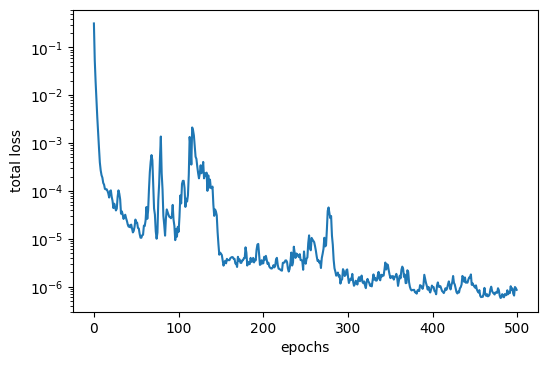

In [ ]:
fig = plt.figure(dpi = 100)
plt.semilogy(history1.history['loss'])
plt.xlabel('epochs')
plt.ylabel('total loss')

**Predicting the new domain for comparing the results.**

In [ ]:
x_inp1 = np.linspace(0,20,1000)
y_pred1 = y.eval(model1, [x_inp1])
y_true1 = np.sin(x_inp1) + 0.1*x_inp1 + 0.1
error1 = np.mean(np.abs(y_pred1 - y_true1))

An average error is equal to  56.08047406689215


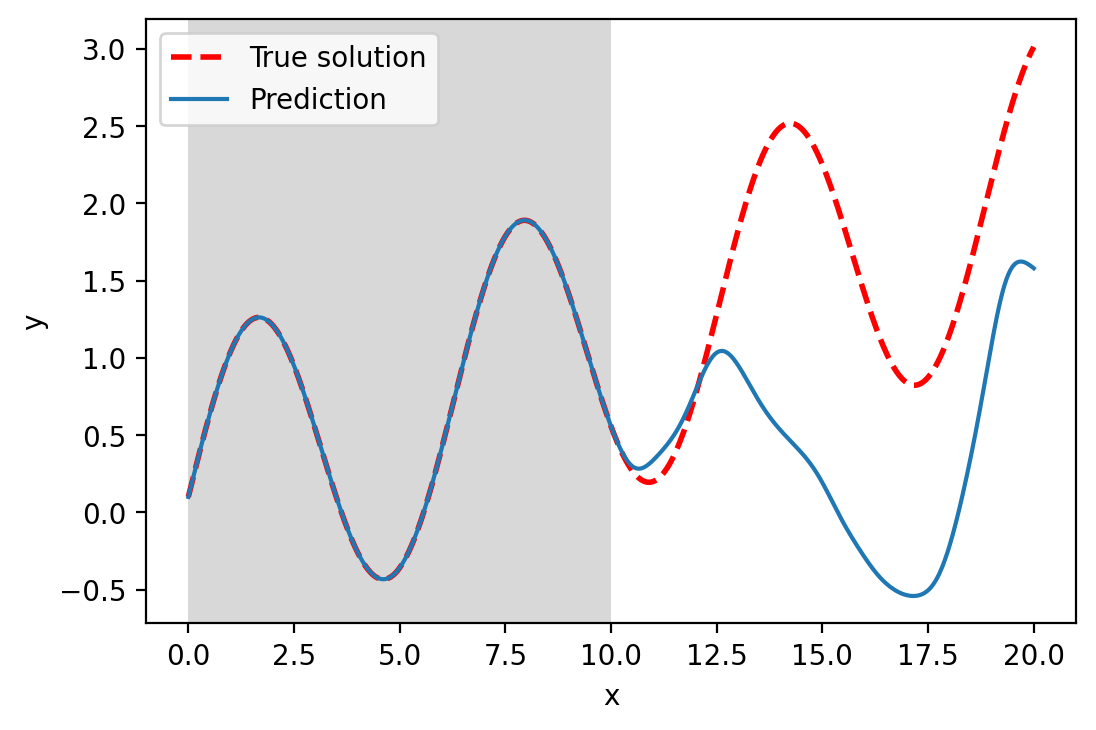

In [ ]:
fig = plt.figure(figsize=(6, 4), dpi = 200)
plt.plot(x_inp1, y_true1, '--r', lw=2, label='True solution')
plt.plot(x_inp1, y_pred1,label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.axvspan(0, 10, facecolor='0.5', alpha=0.3)
print('An average error is equal to ', error1*100)
plt.legend()

**Some hints:**

- For repeating the network, restart the runtime beforehand.

- You only have to use "install sciann -q" once and for further traning you can comment this line.

- For the option with PINN+data, the location of the data point and collocation points are the same.

- For saving the figures, just right click on the photo and save it. 

- For saving the predctions of the network, one can use the command line "np.savetxt('name.txt', y_pred1)".

- For saving the weights of the network, one can use the command line "y.save_weights('name.hdf5')"

- For loading any weights for the same network, one can use the command line "y.load_weights('name.hdf5')"